In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Loading the raw data

In [4]:
# Importing dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

# Descriptive analysis

In [5]:
dataset.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
dataset.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
# Shape of dataset
dataset.shape

(32560, 15)

In [9]:
dataset.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [21]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [22]:
dataset['income'].value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

In [25]:
# Dropping the duplicate Rows
dataset = dataset.drop_duplicates(keep = 'first')
dataset.shape

(32536, 15)

In [13]:
# Columns name we can find from data description 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

dataset.columns = col_labels

In [14]:
# Making sure that the data does not contain unecessary spaces.
dataset=dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Checking null values

In [31]:
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

No null values are there

In [46]:
dataset['age'].nunique()

73

In [30]:
{column:len(dataset[column].unique()) for column in dataset.select_dtypes('object').columns}

{'workclass': 9,
 'education': 16,
 'marital_status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'native_country': 42,
 'income': 2}

From above i can see every object column and how many unique value they have if any column was having all unique value i might be droped that column like id but here the maximun unique value that i can see is 'Native_country': 42

In [47]:
dataset.select_dtypes('object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


# Exploratory Data Analysis

Univariate Analysis

In [52]:
col=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']

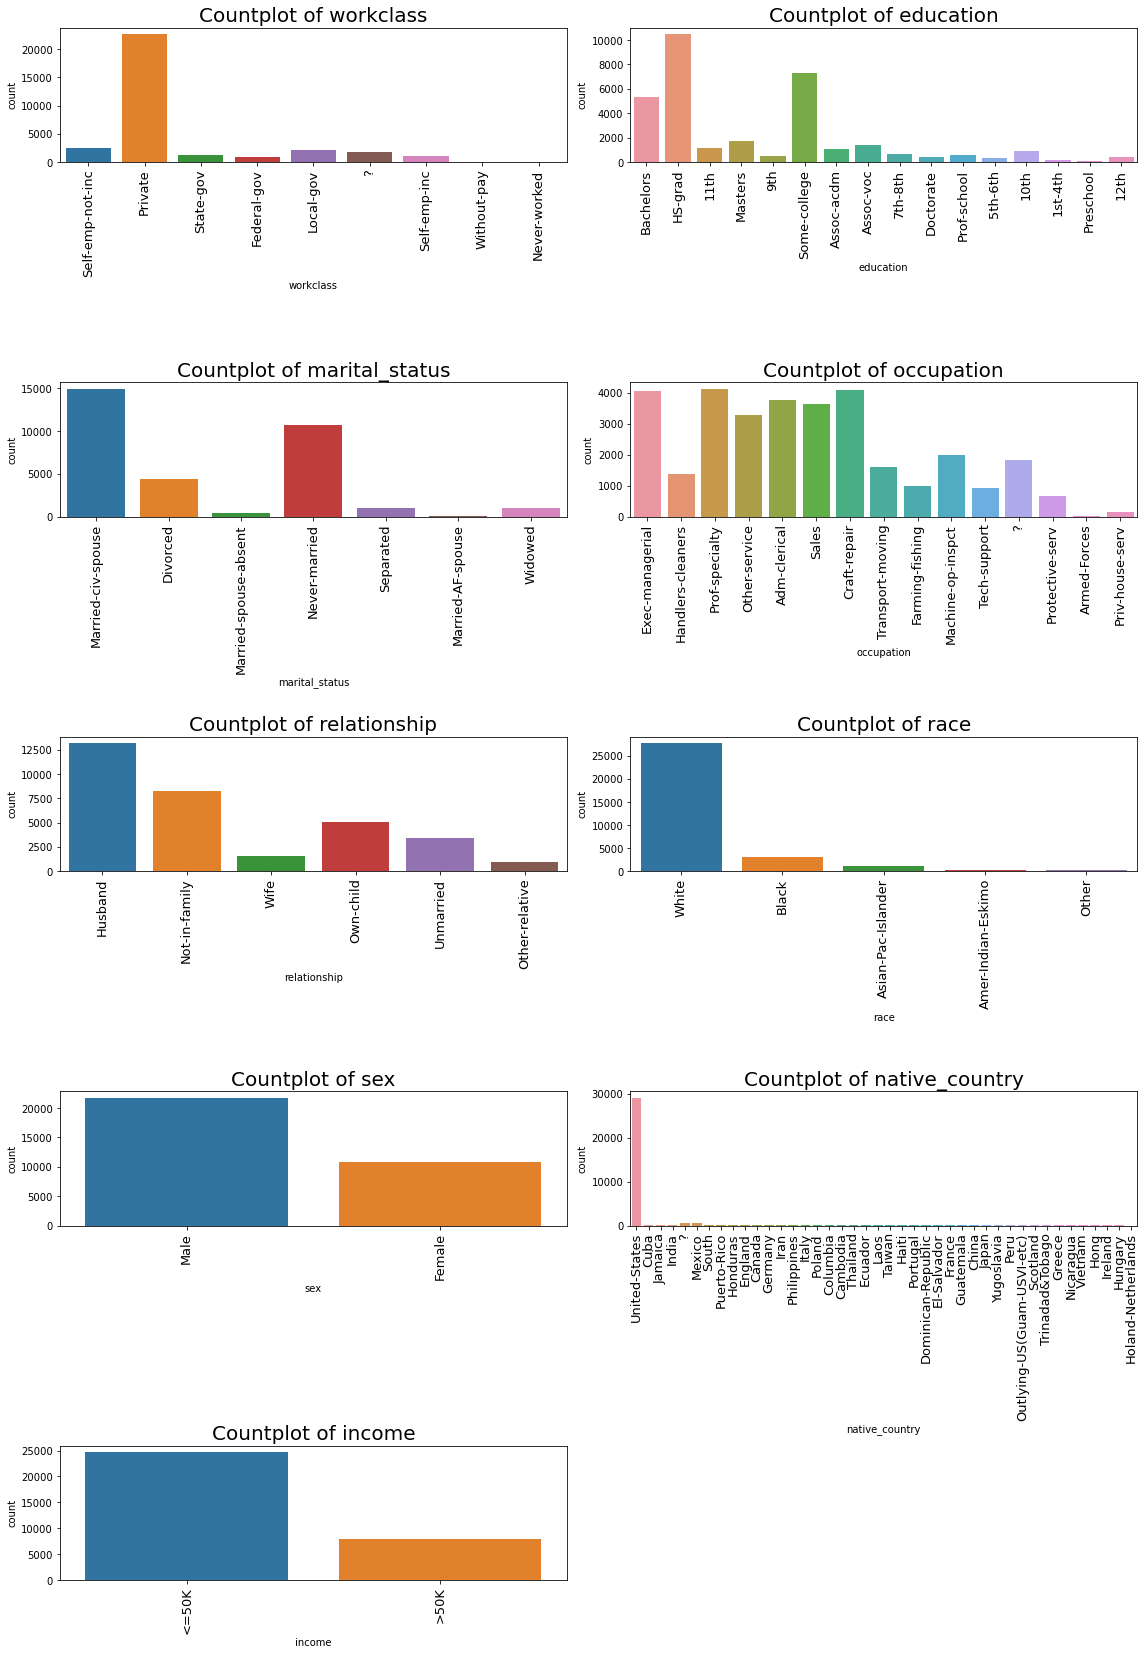

In [53]:
plt.figure(figsize=(16,32))
for i in range(len(col)):
  plt.subplot(7,2,i+1)
  sns.countplot(dataset[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

 Checking label counts for distribution:-

# income

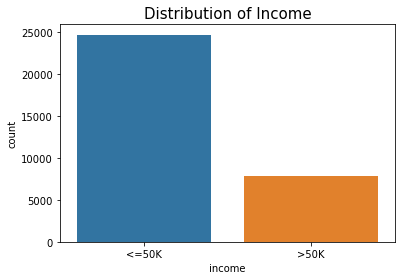

In [37]:
sns.countplot(x='income', data=dataset)
plt.title("Distribution of Income", fontsize = 15)
plt.show()

In [39]:
print('-> Total No. of records : {}\n'.format(len(dataset)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(dataset[dataset['income']==1])/32561)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(dataset[dataset['income']==0])/32561)*100, 2)))

-> Total No. of records : 32536

-> Number of people making more that >50K : 0.0%

-> Number of people making less than or equal to <=50K : 0.0%


# Age

Text(0.5, 1.0, 'Distribution Plot For Age')

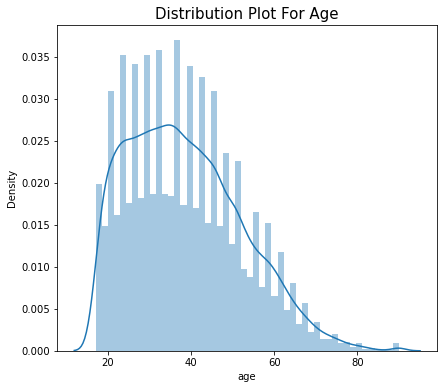

In [54]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(dataset['age'])
plt.title('Distribution Plot For Age', fontsize = 15)

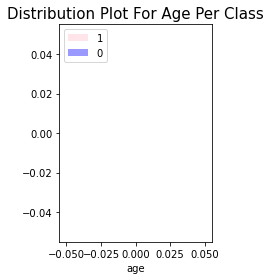

In [57]:
# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(dataset[dataset['income']==1]['age'], label='1', color='pink')
sns.distplot(dataset[dataset['income']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

# workclass

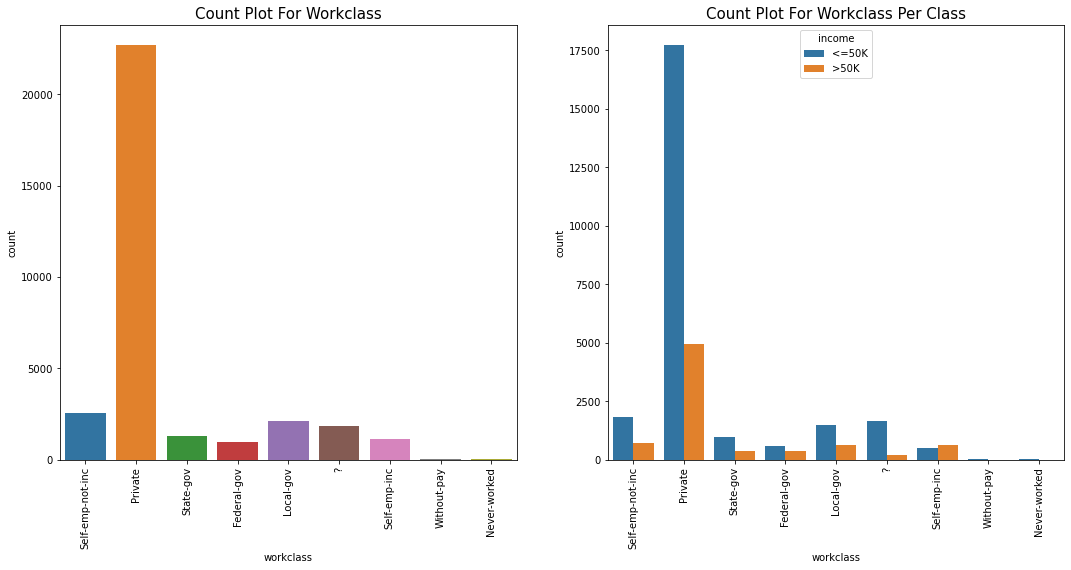

In [58]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(dataset['workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=dataset, x='workclass', hue='income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

# Education

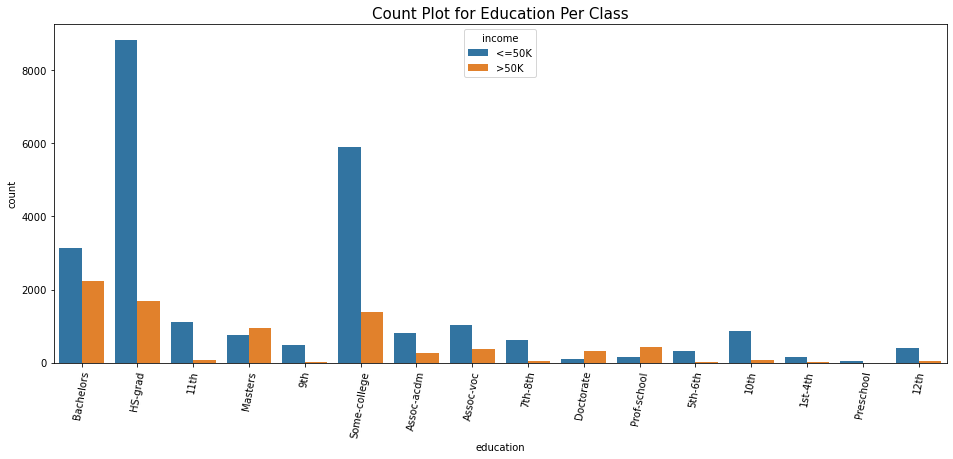

In [67]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,14])
plt.subplot(2,1,1)
sns.countplot(x='education', data=dataset, hue='income')
plt.xticks(rotation=80)
plt.title("Count Plot for Education Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.25)

# Education number

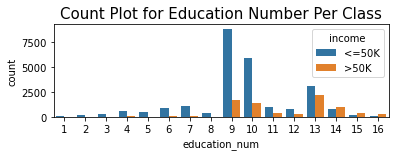

In [65]:
# Count Plot for Education Number Per Class
plt.subplot(2,1,2)
sns.countplot(x='education_num', data=dataset, hue='income')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [71]:
education_classes = dataset['education'].unique()
for educ_class in education_classes:
    print("{}, the education Number is {}".
          format(educ_class, dataset[dataset['education'] == educ_class]['education_num'].unique()))

Bachelors, the education Number is [13]
HS-grad, the education Number is [9]
11th, the education Number is [7]
Masters, the education Number is [14]
9th, the education Number is [5]
Some-college, the education Number is [10]
Assoc-acdm, the education Number is [12]
Assoc-voc, the education Number is [11]
7th-8th, the education Number is [4]
Doctorate, the education Number is [16]
Prof-school, the education Number is [15]
5th-6th, the education Number is [3]
10th, the education Number is [6]
1st-4th, the education Number is [2]
Preschool, the education Number is [1]
12th, the education Number is [8]


In [72]:
#since education and education number are same i m droppin edu_num column
dataset.drop(labels='education_num', axis=1, inplace=True)

# Gender

Text(0.5, 1.0, 'Countplot for Gender Per Class')

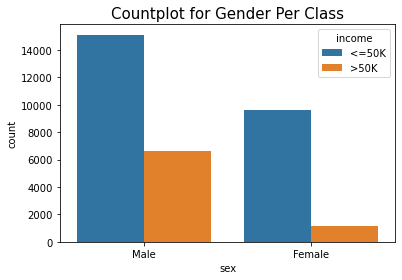

In [74]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=dataset, hue='income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

# Maritial Status

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Married-civ-spouse'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Married-spouse-absent'),
  Text(3, 0, 'Never-married'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-AF-spouse'),
  Text(6, 0, 'Widowed')])

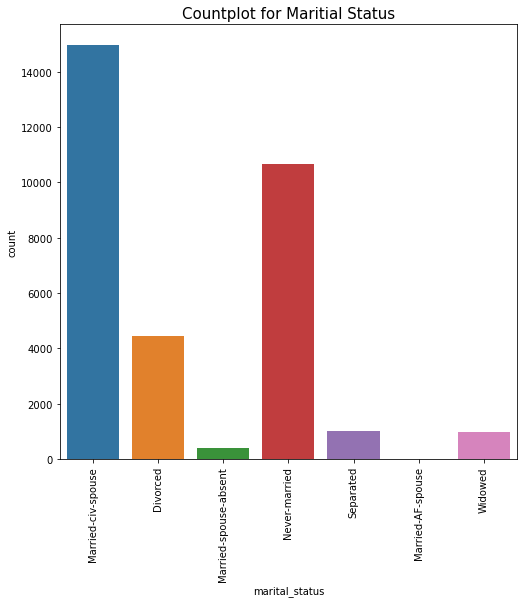

In [76]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(dataset['marital_status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)



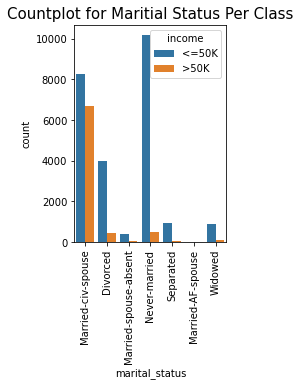

In [78]:
# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(dataset['marital_status'],hue=dataset['income'])
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [79]:
print('\n --Value Counts-- \n')
print(dataset['marital_status'].value_counts())


 --Value Counts-- 

Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


# Relationship

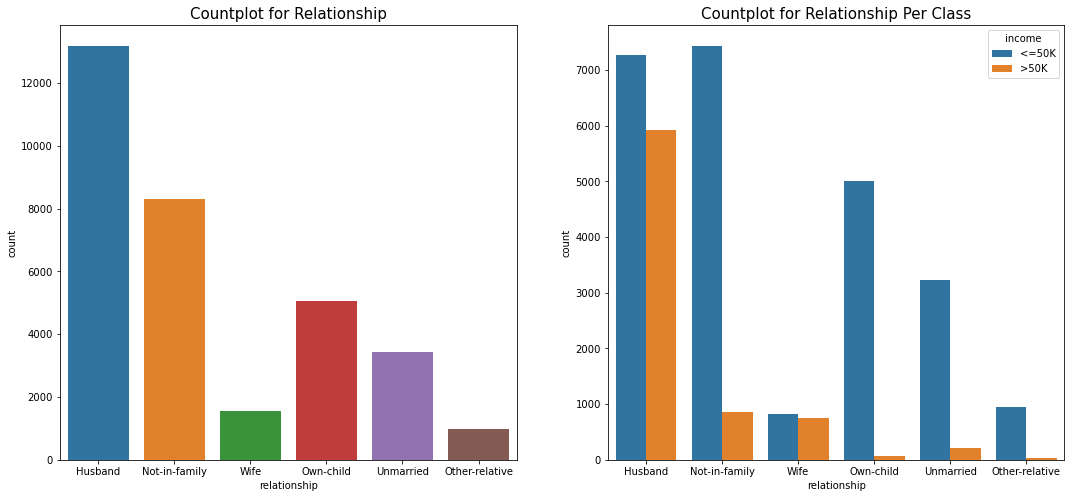

In [81]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(dataset['relationship'])
plt.title('Countplot for Relationship', fontsize = 15)


plt.subplot(1,2,2)
sns.countplot(dataset['relationship'],hue=dataset['income'])
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()

In [82]:
print('\n --Value Counts-- \n')
print(dataset['relationship'].value_counts())


 --Value Counts-- 

Husband           13187
Not-in-family      8291
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


# Race

Text(0.5, 1.0, 'Countplot for Race Per Class')

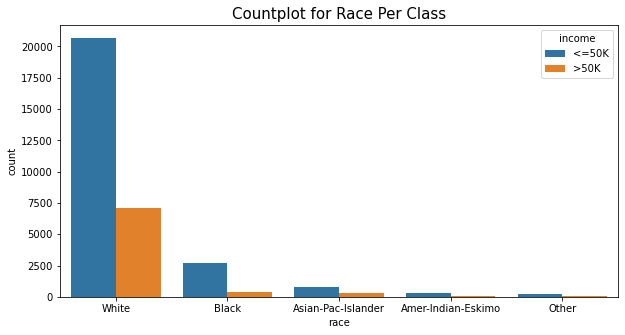

In [83]:
plt.figure(figsize=[10,5])
sns.countplot(dataset['race'], hue=dataset['income'])
plt.title('Countplot for Race Per Class', fontsize = 15)

# Country

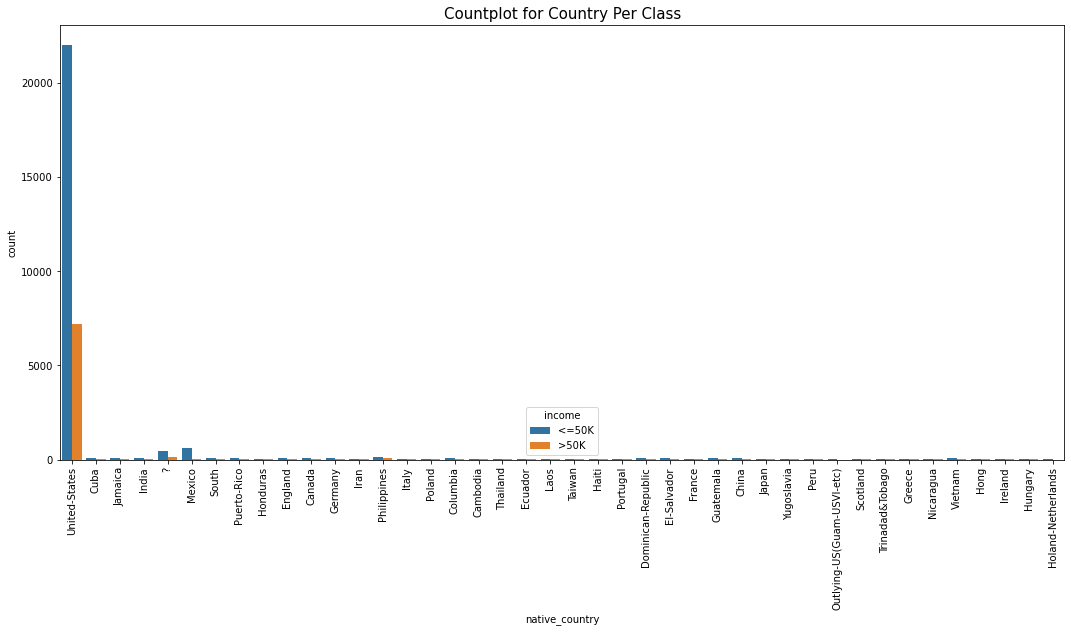

In [85]:
plt.figure(figsize=[18,8])
sns.countplot(dataset['native_country'],hue=dataset['income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [87]:
print('\n --Value Counts-- \n')
print(dataset['native_country'].value_counts())


 --Value Counts-- 

United-States                 29152
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France 

# Occupation

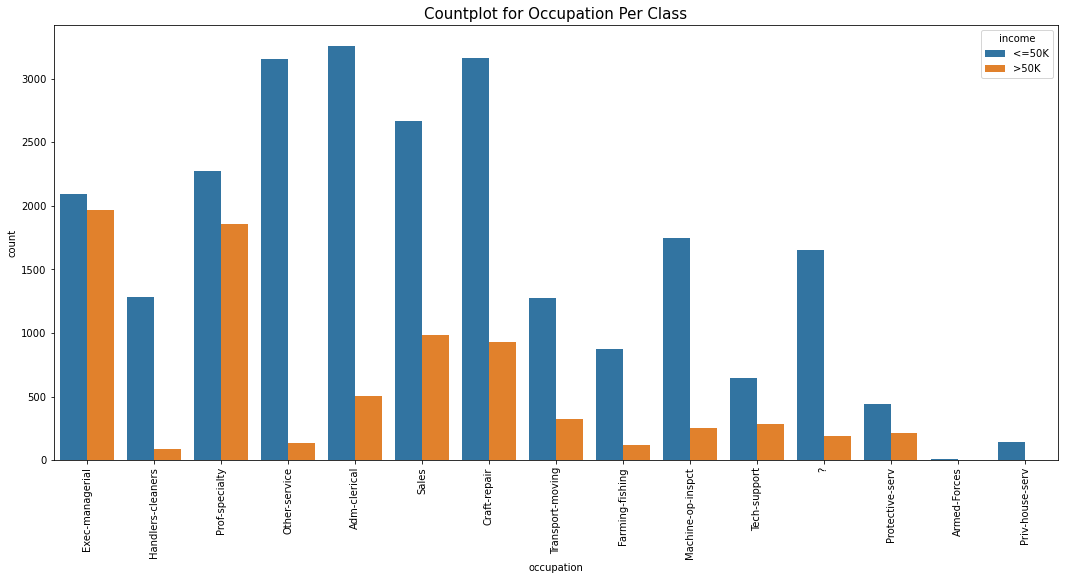

In [88]:
plt.figure(figsize=[18,8])
sns.countplot(dataset['occupation'], hue=dataset['income'])
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

# Hours per week

Text(0.5, 1.0, 'Distribution plot for hours per week')

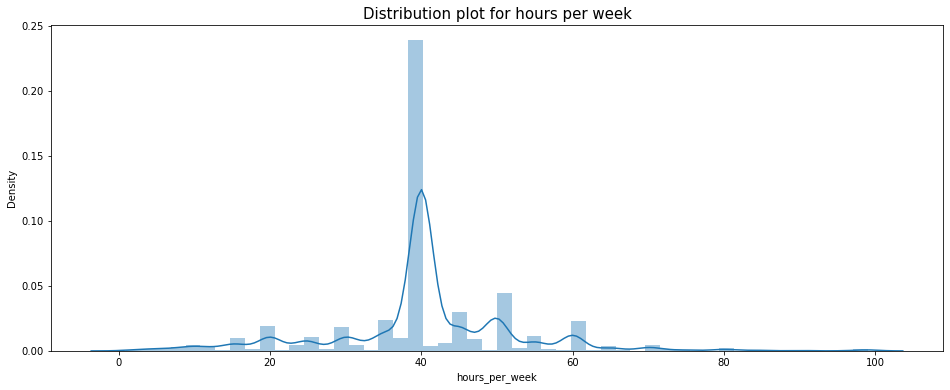

In [89]:
# Distribution plot for hours per week column
plt.figure(figsize=[16,6])
sns.distplot(dataset['hours_per_week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

# Bivariate Analysis

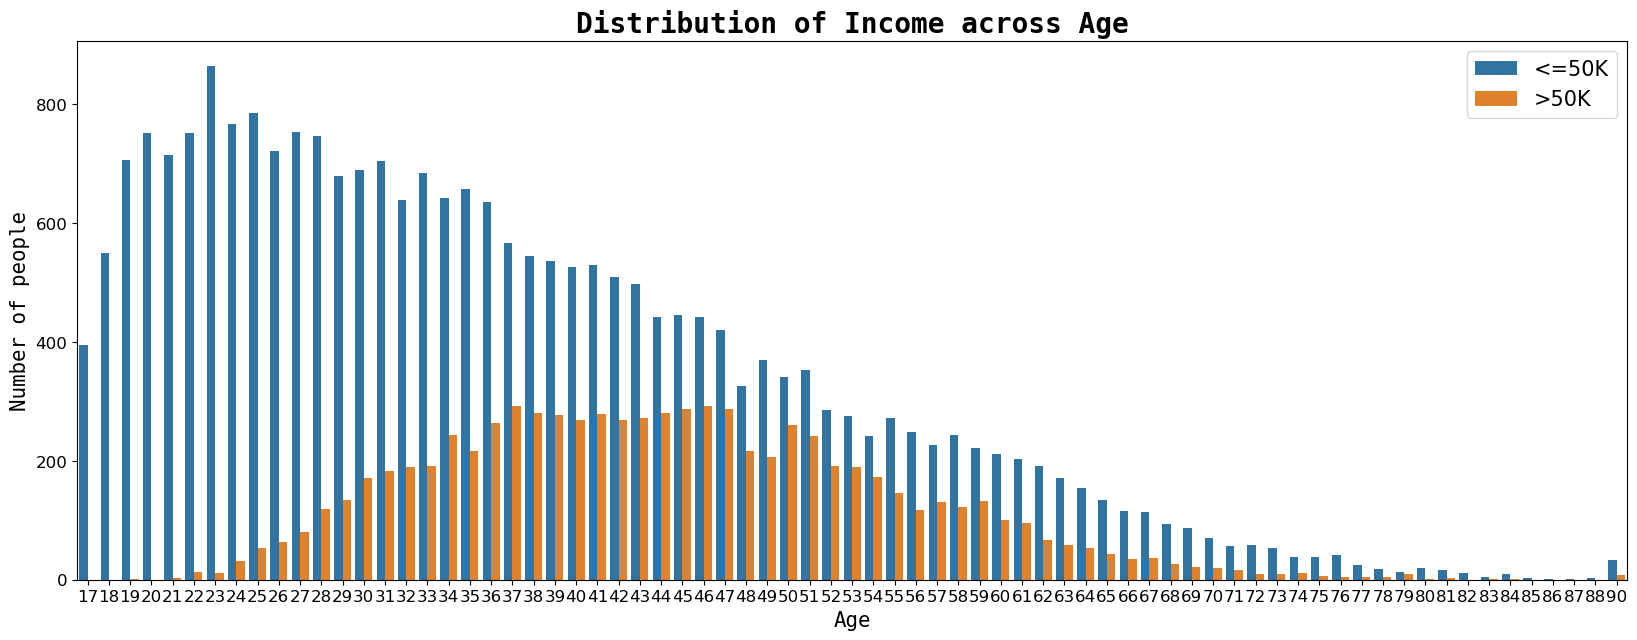

In [90]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

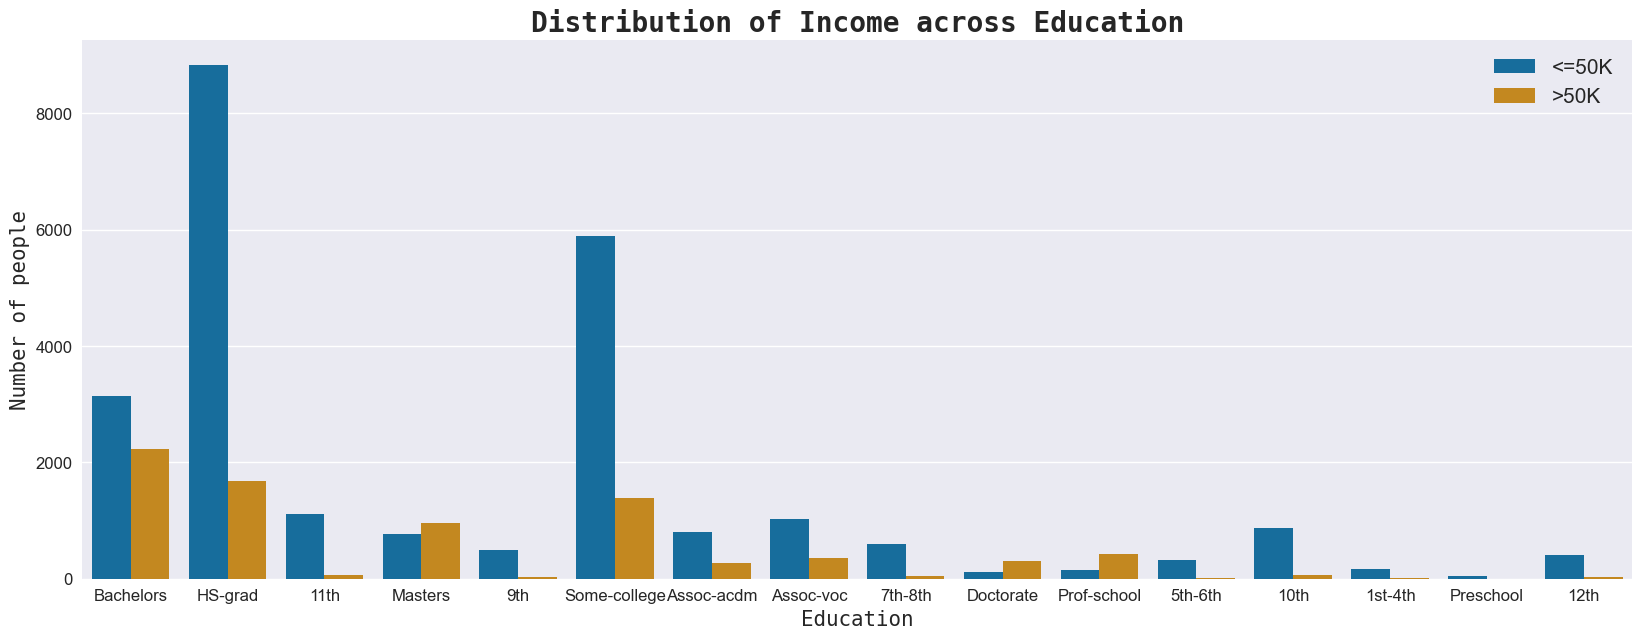

In [91]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education'],
              hue=dataset['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

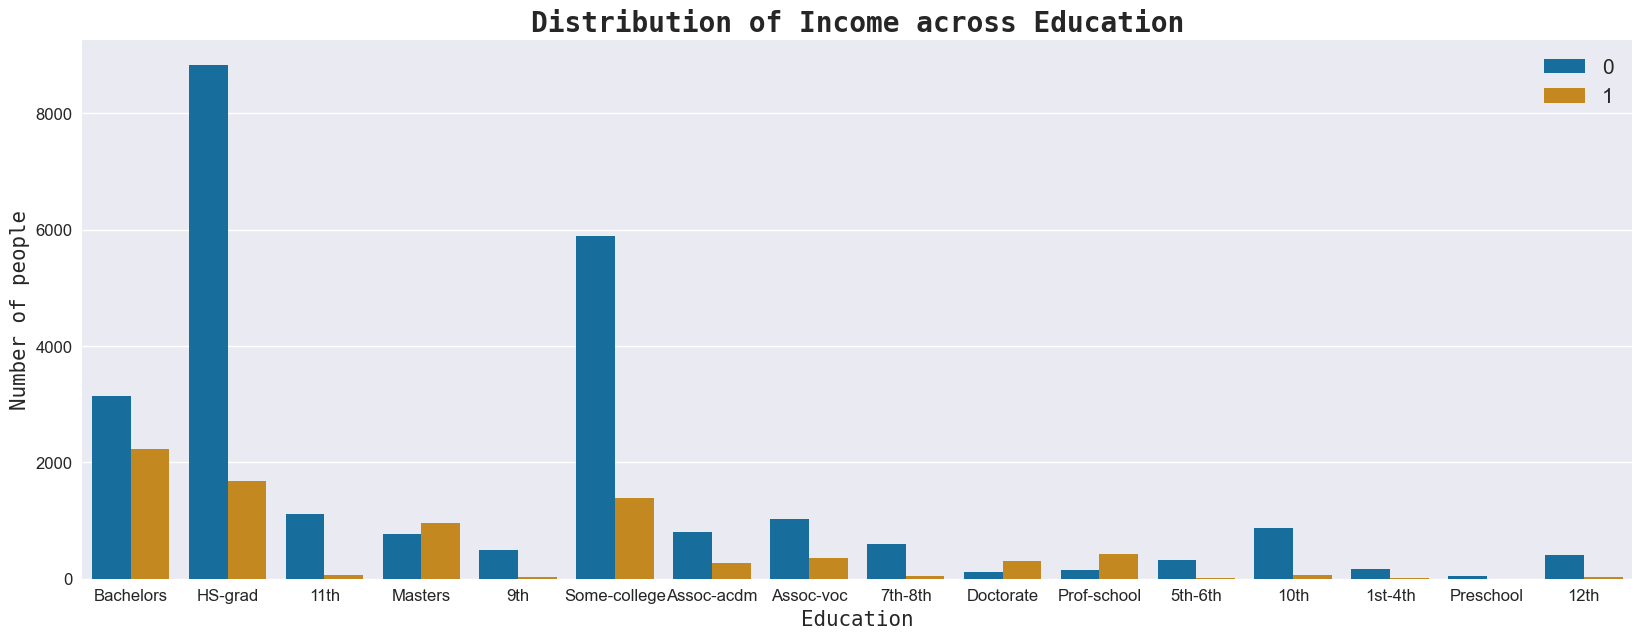

In [100]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['education'],
              hue=dataset['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# Multivariate Analysis

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['income'] = le.fit_transform(dataset['income'])

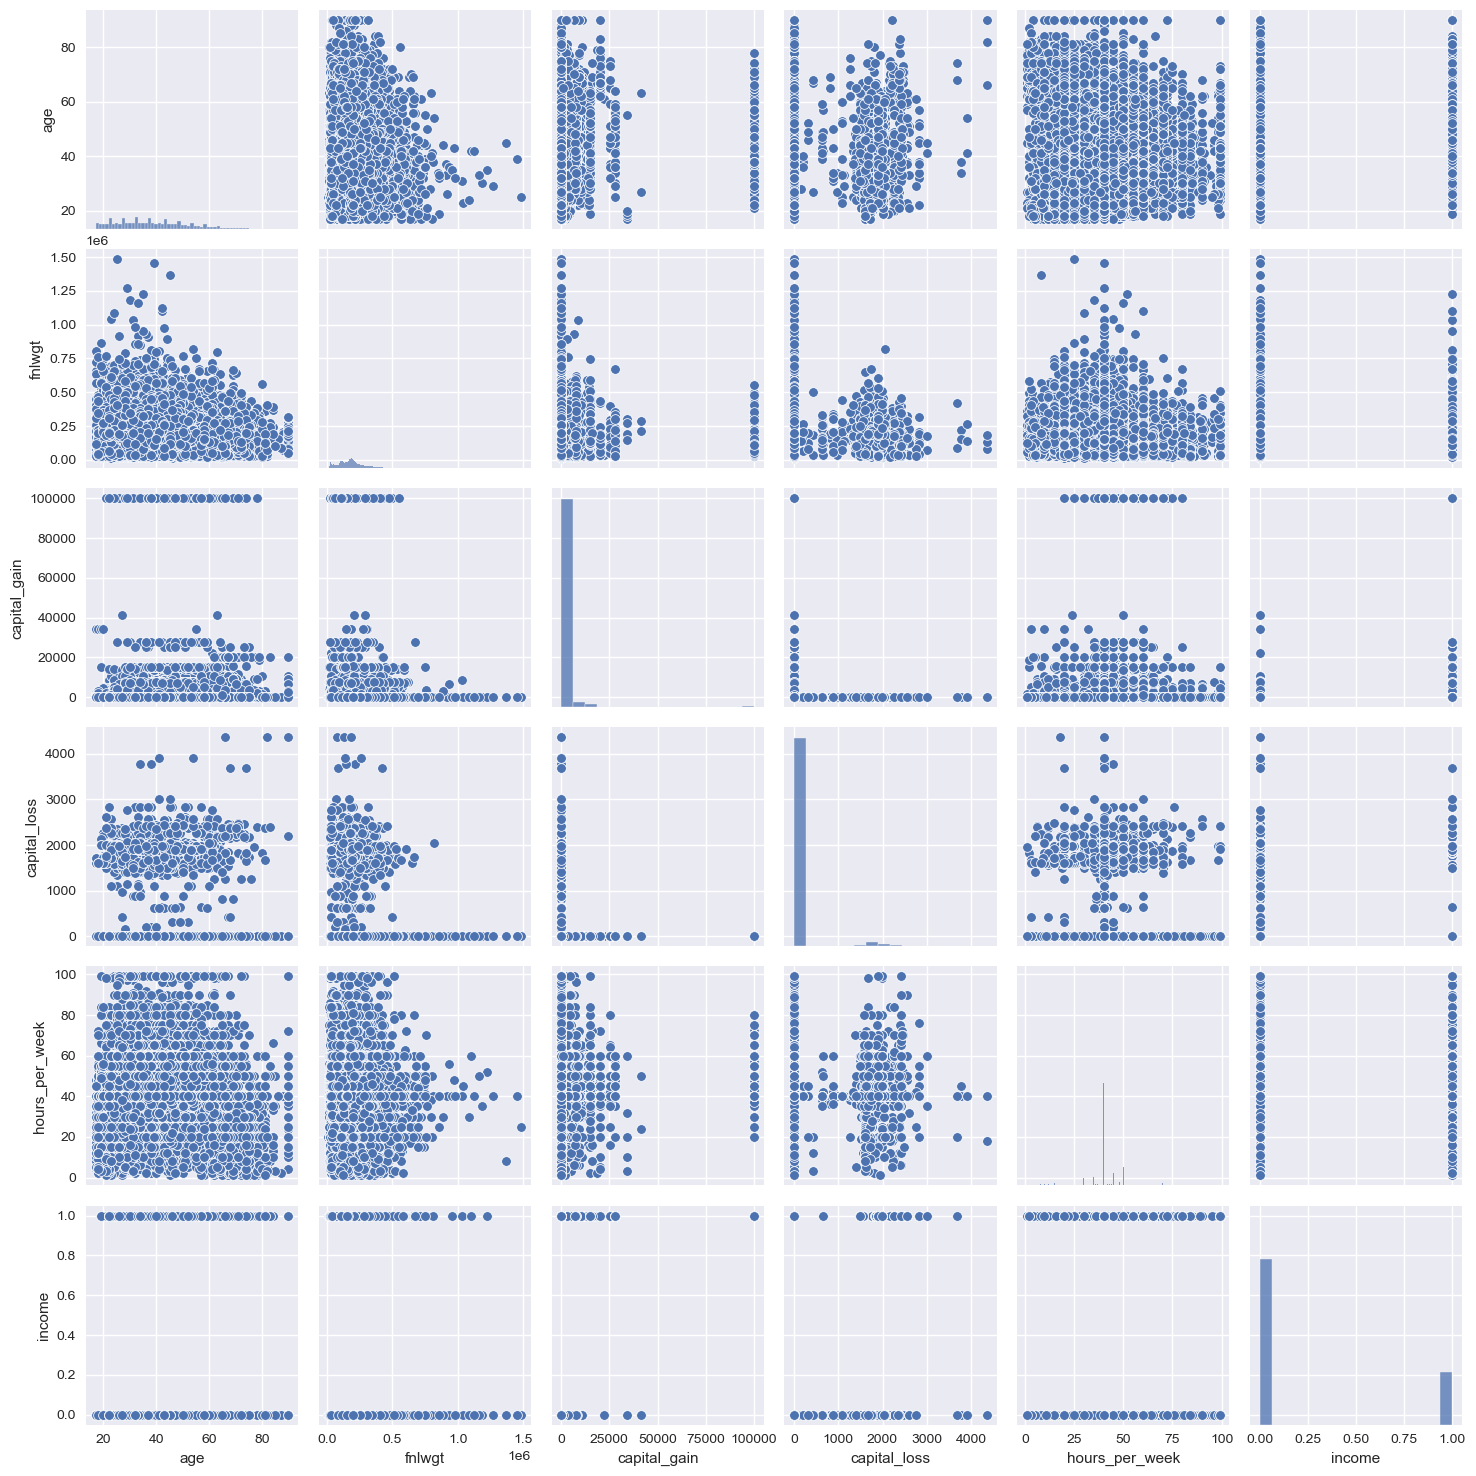

In [99]:
# Creating a pairplot of dataset
sns.pairplot(dataset)
plt.savefig('multi1.png')
plt.show()

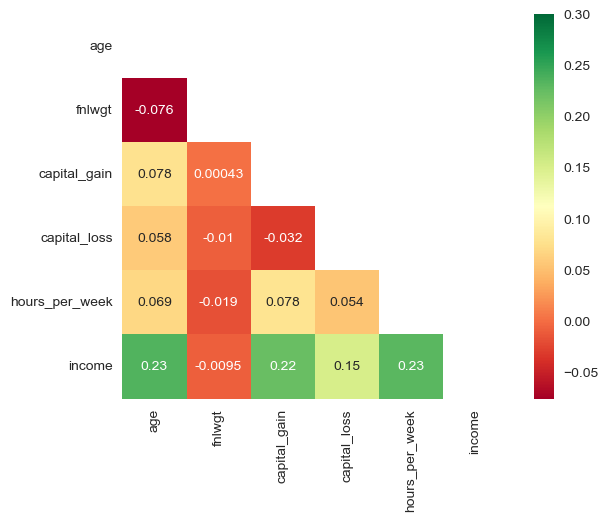

In [102]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

# Feature selection

In [103]:
from sklearn.preprocessing import LabelEncoder
temp_data = dataset.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

marital_status    0.434839
relationship      0.250955
age               0.234039
hours_per_week    0.229659
capital_gain      0.223340
sex               0.215984
capital_loss      0.150498
education         0.079361
occupation        0.075398
race              0.071855
workclass         0.051706
native_country    0.015623
fnlwgt            0.009521
dtype: float64


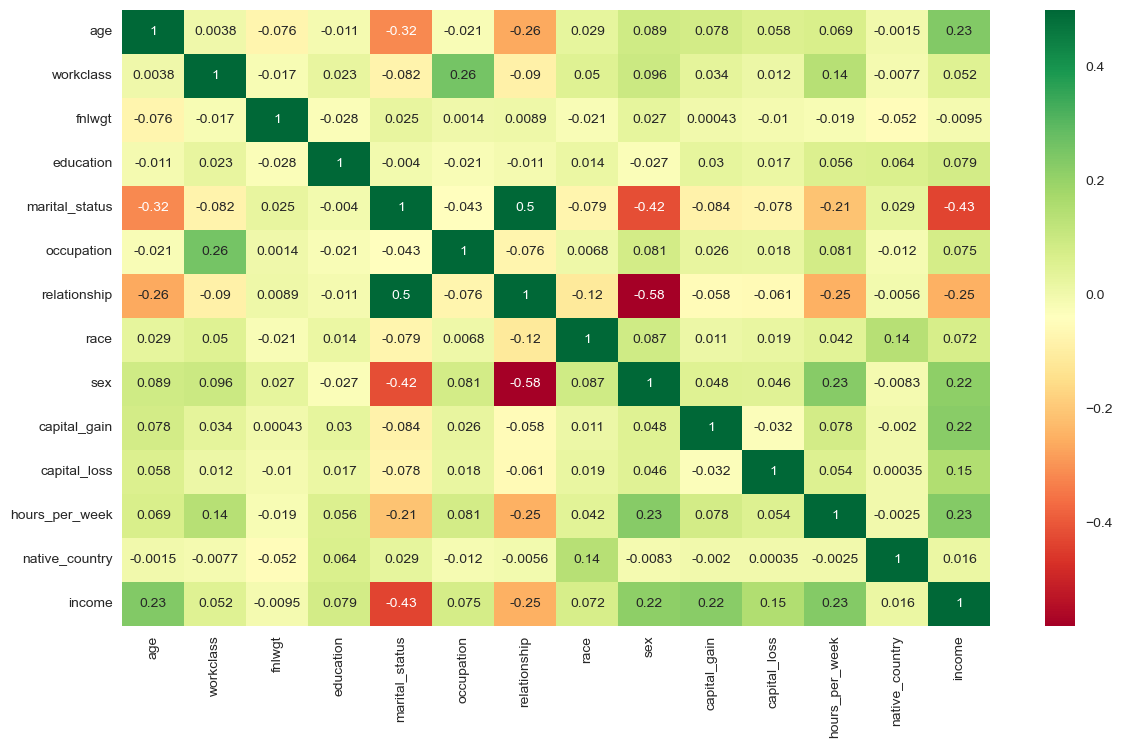

In [105]:
# Correlation Heatmap
plt.figure(figsize=[14,8])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

# Label Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [119]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [121]:
selector.fit(X, Y)
ExtraTreesClassifier(random_state=42)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.35
1 4.41
2 16.84
3 9.59
4 12.53
5 8.72
6 5.19
7 1.42
8 1.87
9 9.59
10 3.15
11 9.54
12 1.8


In [137]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital_loss', 'native_country'], axis=1)


KeyError: "['workclass' 'education' 'race' 'sex' 'capital_loss' 'native_country'] not found in axis"

# Feature Scaling

In [133]:
# from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [134]:
X = final_features.drop(['income'],axis=1)
y = final_features['income']

NameError: name 'final_features' is not defined

In [132]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, Y)
RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

ModuleNotFoundError: No module named 'imblearn'

# Creating a train test split

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

NameError: name 'X_resampled' is not defined

In [130]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

NameError: name 'X_train' is not defined